<a href="https://colab.research.google.com/github/tejaspradhan/Sentiment-Analysis/blob/main/code/Sentiment_Analysis_Machine_Learning_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applying Text Classification Algorithms on Preprocessed Data

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
train_data = pd.read_csv('train_preprocessed.csv')
test_data = pd.read_csv('test_preprocessed.csv')

## Approach 
1. Convert Words to Appropriate Word Vectors - Count Vectorizer & TF-IDF


2. Feed The Vectorized word arrays to classification algorithm and train the model


3. Evaluate model on test data

In [3]:
# Instantiating Count Vectorizer and TF-IDF transformer
vectorizer = CountVectorizer()
transformer = TfidfTransformer()

In [4]:
x,y = train_data['cleaned_tweet'],train_data['label']
x.shape,y.shape

((31962,), (31962,))

In [5]:
# vectorising the word corpus into count vectors
x_vec = vectorizer.fit_transform(x)
x_tfidf = transformer.fit_transform(x_vec)

In [6]:
x_tfidf.shape, y.shape

((31962, 37235), (31962,))

## Oversampling the Minority Class - 1
As the dataset is imbalanced, we need to first balance it by oversampling. Else, we may get misleading accuracies whereas the model will be biased towards 1 particular class

In [7]:
resampler= SMOTE()

In [8]:
x_tfidf,y = resampler.fit_resample(x_tfidf,y)

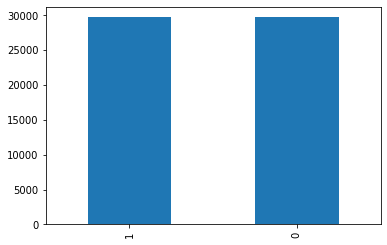

In [9]:
y.value_counts().plot(kind='bar')

## Splitting the Training Data Into Training and Validation Sets

In [10]:
 x_train,x_val,y_train,y_val = train_test_split(x_tfidf,y,test_size=0.3)

In [11]:
x_train.shape, y_train.shape,x_val.shape, y_val.shape

((41608, 37235), (41608,), (17832, 37235), (17832,))

In [12]:
x_test = test_data['cleaned_tweet']
x_test.shape

(17197,)

In [13]:
x_train[0:5] # Each row in this is a string

<5x37235 sparse matrix of type '<class 'numpy.float64'>'
	with 89 stored elements in Compressed Sparse Row format>

## Model Training 

In [14]:
# Defining a train model function which takes a particular model as a parameter and return the validation accuracy 
def train_model(model):
  model.fit(x_train,y_train)
  y_pred = model.predict(x_val)
  return list(y_pred), metrics.accuracy_score(y_val,y_pred)

## Multinomial Naive Bayes Model 

In [15]:
model = MultinomialNB()
predictions, accuracy = train_model(model)
accuracy

0.9497532525796322

Tuning the Hyper Parameter Alpha of Naive Bayes

In [16]:
alphas = np.arange(0.1,1,0.1)

In [17]:
accuracies = []
for a in alphas:
  model = MultinomialNB(alpha=a)
  predictions,accuracy = train_model(model)
  accuracies.append(accuracy)

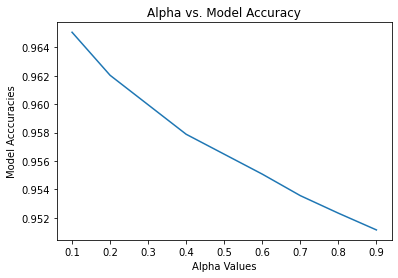

In [18]:
plt.title('Alpha vs. Model Accuracy')
plt.xlabel('Alpha Values')
plt.ylabel('Model Acccuracies')
plt.plot(alphas,accuracies)

In [19]:
# Finding that value of alpha which pertains to the highest accuracy
alphas[np.argmax(accuracies)]

0.1

In [20]:
# Final Model 
predictions,accuracy = train_model(MultinomialNB(alpha=0.1))
print(accuracy)

0.9650628084342755


## Classification Report

In [21]:
print(metrics.classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      8991
           1       0.94      0.99      0.97      8841

    accuracy                           0.97     17832
   macro avg       0.97      0.97      0.97     17832
weighted avg       0.97      0.97      0.97     17832



**Result : Naive Bayes Validation Accuray is 96.35%**

## Support Vector Machines Model 

In [22]:
predictions,accuracy = train_model(LinearSVC())
print(accuracy)

0.9866532077164648


Hyperparameter Tuning for SVM 

In [23]:
c_values = np.arange(0.1,1,0.1)
accuracies = []
for c in c_values: 
  preds, accuracy = train_model(LinearSVC(C=c))
  accuracies.append(accuracy)

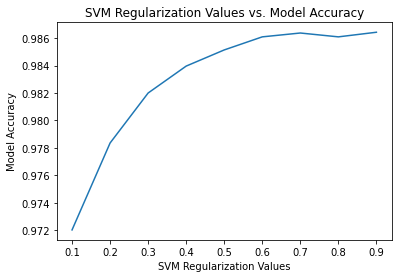

In [24]:
plt.title('SVM Regularization Values vs. Model Accuracy')
plt.xlabel('SVM Regularization Values')
plt.ylabel('Model Accuracy')
plt.plot(c_values,accuracies)

In [25]:
c_values[np.argmax(accuracies)]

0.9

In [26]:
# Final SVM model 
preds, accuracy = train_model(LinearSVC(C=0.9))
print(accuracy)

0.9864288918797667


Classification Report - SVM 

In [27]:
print(metrics.classification_report(y_val,preds))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      8991
           1       0.97      1.00      0.99      8841

    accuracy                           0.99     17832
   macro avg       0.99      0.99      0.99     17832
weighted avg       0.99      0.99      0.99     17832



**Result - SVM validation Accuracy is 98.6%**

## The End